In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df=pd.read_csv('./dataset/news.csv')


df.shape
df.head()



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
labels=df.label
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


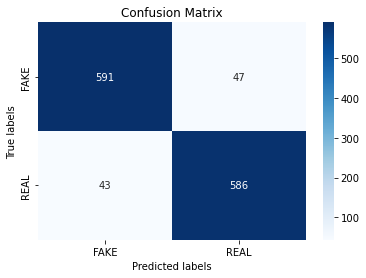

In [3]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])       # Build confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

plt.show()

In [4]:
import pyaudio
import wave


FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = int(input("Enter time duration in seconds: "))
WAVE_OUTPUT_FILENAME = "./sound/output.wav"
6

audio = pyaudio.PyAudio()


stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)
print("Recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording finished.")


stream.stop_stream()
stream.close()
audio.terminate()

with wave.open(WAVE_OUTPUT_FILENAME, 'wb') as wf:                              # Saving the audio to a WAV file
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
print(f"Saved to {WAVE_OUTPUT_FILENAME}.")

Enter time duration in seconds: 7
Recording
Recording finished.
Saved to ./sound/output.wav.


In [5]:
import speech_recognition as sr

r = sr.Recognizer()

with sr.AudioFile('./sound/output.wav') as source:
    audio_text = r.listen(source)
    try:
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
    except:
         print('Sorry.. run again...')

Converting audio transcripts into text ...
oil prices Rises for the fourth time in the year


In [6]:
def detect_fake_news(text):
   
    tfidf_text = tfidf_vectorizer.transform([text])
    
    prediction = pac.predict(tfidf_text)
    
    if prediction[0] == 'FAKE':
        print("The provided text is classified as FAKE news.")                       #result 
    else:
        print("The provided text is classified as REAL news.")


text_to_check = "example news "

detect_fake_news(text)


The provided text is classified as REAL news.
